In [2]:
# import necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy 


In [3]:
import os
os.getcwd()

'c:\\Users\\Suraphel\\Desktop\\Week-0\\Optimal-Solar-Investment-Analysis\\notebooks'

In [4]:
# Load the datasets for countries
benin_df = pd.read_csv('c:\\Users\\Suraphel\\Desktop\\Week-0\\Optimal-Solar-Investment-Analysis\\notebooks\\benin.csv')
sierraleone_df = pd.read_csv('c:\\Users\\Suraphel\\Desktop\\Week-0\\Optimal-Solar-Investment-Analysis\\notebooks\\sierraleone.csv')
togo_df = pd.read_csv('c:\\Users\\Suraphel\\Desktop\\Week-0\\Optimal-Solar-Investment-Analysis\\notebooks\\togo.csv')

In [5]:
# Inspect the structure of each dataset to ensure the columns match

print(benin_df.columns)
print(sierraleone_df.columns)
print(togo_df.columns)

Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')
Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')
Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'Comments'],
      dtype='object')


In [7]:
# Add a country colum to each dataset_

benin_df['country'] = 'Benin'
sierraleone_df['country'] = 'Sierra Leone'
togo_df['country'] = 'Togo'

In [8]:
# Merge the datasets

merged_data = pd.concat([benin_df,sierraleone_df,togo_df], ignore_index=True)

In [9]:
merged_data.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   

   Comments country  
0       NaN   Benin  
1       NaN   Benin  
2       NaN   Benin  
3       NaN   Benin  
4       NaN   Benin

In [10]:
merged_data.tail()


Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
1576795  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
1576796  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
1576797  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
1576798  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
1576799  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  52.3  0.0     0.0   

         WSstdev   WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB  \
1576795      0.0  0.0      0.0  977         0            0.0   24.3   24.0   
1576796      0.0  0.0      0.0  977         0            0.0   24.3   24.0   
1576797      0.0  0.0      0.0  977         0            0.0   24.2   23.9   
1576798      0.0  0.0      0.0  977         0            0.0   24.1   23.8   
1576799      0.0  0.0      0.0  977         0            0.0   24.1   23.8   

         Comments country  
1576795       NaN    Togo  
1576796       NaN    Togo  
1576797       NaN    Togo  
1576798       NaN    Togo  
1576799       NaN    Togo

In [11]:
merged_data.shape

(1576800, 20)

In [12]:
merged_data.describe()

GHI           DNI           DHI          ModA          ModB  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   2.243573e+02  1.449408e+02  1.151746e+02  2.231257e+02  2.155223e+02   
std    3.181073e+02  2.453781e+02  1.580602e+02  3.154732e+02  3.049439e+02   
min   -1.950000e+01 -7.800000e+00 -1.790000e+01  0.000000e+00  0.000000e+00   
25%   -2.200000e+00 -2.000000e-01 -1.400000e+00  0.000000e+00  0.000000e+00   
50%    1.200000e+00  0.000000e+00  1.400000e+00  4.100000e+00  4.000000e+00   
75%    4.244000e+02  2.270000e+02  2.190000e+02  4.111000e+02  3.973000e+02   
max    1.499000e+03  1.004500e+03  8.920000e+02  1.507000e+03  1.473000e+03   

               Tamb            RH            WS        WSgust       WSstdev  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   2.741696e+01  6.298333e+01  1.878440e+00  2.576763e+00  4.649840e-01   
std    5.131024e+00  2.854366e+01  1.536357e+00  1.961275e+00  2.904002e-01   
min    1.100000e+01  2.100000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.370000e+01  3.860000e+01  6.000000e-01  1.100000e+00  4.000000e-01   
50%    2.680000e+01  6.900000e+01  1.800000e+00  2.400000e+00  5.000000e-01   
75%    3.100000e+01  8.860000e+01  2.800000e+00  3.600000e+00  6.000000e-01   
max    4.380000e+01  1.000000e+02  1.950000e+01  2.660000e+01  4.700000e+00   

                 WD       WDstdev            BP      Cleaning  Precipitation  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   1.576800e+06   
mean   1.494072e+02  8.771398e+00  9.899963e+02  8.079655e-04   2.697615e-03   
std    1.039399e+02  6.790689e+00  1.046797e+01  2.841326e-02   3.803610e-02   
min    0.000000e+00  0.000000e+00  9.680000e+02  0.000000e+00   0.000000e+00   
25%    5.330000e+01  2.900000e+00  9.770000e+02  0.000000e+00   0.000000e+00   
50%    1.803000e+02  9.000000e+00  9.940000e+02  0.000000e+00   0.000000e+00   
75%    2.342000e+02  1.290000e+01  9.990000e+02  0.000000e+00   0.000000e+00   
max    3.600000e+02  9.940000e+01  1.006000e+03  1.000000e+00   2.500000e+00   

              TModA         TModB  Comments  
count  1.576800e+06  1.576800e+06       0.0  
mean   3.339823e+01  3.286939e+01       NaN  
std    1.290953e+01  1.238889e+01       NaN  
min    9.000000e+00  8.100000e+00       NaN  
25%    2.370000e+01  2.370000e+01       NaN  
50%    2.830000e+01  2.800000e+01       NaN  
75%    4.260000e+01  4.190000e+01       NaN  
max    8.100000e+01  9.460000e+01       NaN

In [13]:
# information about the dataset

merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1576800 entries, 0 to 1576799
Data columns (total 20 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   Timestamp      1576800 non-null  object 
 1   GHI            1576800 non-null  float64
 2   DNI            1576800 non-null  float64
 3   DHI            1576800 non-null  float64
 4   ModA           1576800 non-null  float64
 5   ModB           1576800 non-null  float64
 6   Tamb           1576800 non-null  float64
 7   RH             1576800 non-null  float64
 8   WS             1576800 non-null  float64
 9   WSgust         1576800 non-null  float64
 10  WSstdev        1576800 non-null  float64
 11  WD             1576800 non-null  float64
 12  WDstdev        1576800 non-null  float64
 13  BP             1576800 non-null  int64  
 14  Cleaning       1576800 non-null  int64  
 15  Precipitation  1576800 non-null  float64
 16  TModA          1576800 non-null  float64
 17  TModB   

In [14]:
# finding the number of missing values

merged_data.isnull().sum()

Timestamp              0
GHI                    0
DNI                    0
DHI                    0
ModA                   0
ModB                   0
Tamb                   0
RH                     0
WS                     0
WSgust                 0
WSstdev                0
WD                     0
WDstdev                0
BP                     0
Cleaning               0
Precipitation          0
TModA                  0
TModB                  0
Comments         1576800
country                0
dtype: int64

In [15]:
# drop comments columen
merged_data = merged_data.drop(columns='Comments', axis=1)

In [16]:
merged_data.head()

Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   

   WSstdev     WD  WDstdev   BP  Cleaning  Precipitation  TModA  TModB country  
0      0.1  122.1      0.0  998         0            0.0   26.3   26.2   Benin  
1      0.0    0.0      0.0  998         0            0.0   26.3   26.2   Benin  
2      0.5  124.6      1.5  997         0            0.0   26.4   26.2   Benin  
3      0.4  120.3      1.3  997         0            0.0   26.4   26.3   Benin  
4      0.3  113.2      1.0  997         0            0.0   26.4   26.3   Benin

In [17]:
print(merged_data['country'].unique())
print(merged_data['country'].value_counts())

['Benin' 'Sierra Leone' 'Togo']
country
Benin           525600
Sierra Leone    525600
Togo            525600
Name: count, dtype: int64


In [18]:
# check for missing values in the dataset

missing_values = merged_data.isnull().sum()

# calculating percentage of missing values for each column

missing_percentage = (missing_values / len(merged_data)) * 100

# display columns with missing values

print("Missing Values:\n", missing_values)
print("\nPercnetage of Missing Values:\n", missing_percentage)

Missing Values:
 Timestamp        0
GHI              0
DNI              0
DHI              0
ModA             0
ModB             0
Tamb             0
RH               0
WS               0
WSgust           0
WSstdev          0
WD               0
WDstdev          0
BP               0
Cleaning         0
Precipitation    0
TModA            0
TModB            0
country          0
dtype: int64

Percnetage of Missing Values:
 Timestamp        0.0
GHI              0.0
DNI              0.0
DHI              0.0
ModA             0.0
ModB             0.0
Tamb             0.0
RH               0.0
WS               0.0
WSgust           0.0
WSstdev          0.0
WD               0.0
WDstdev          0.0
BP               0.0
Cleaning         0.0
Precipitation    0.0
TModA            0.0
TModB            0.0
country          0.0
dtype: float64


In [20]:
from scipy.stats import zscore

# Select columns for outlier detection
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate Z-scores for the selected columns
z_scores = merged_data[columns_to_check].apply(zscore)

# Identify rows with Z-scores greater than 3 (or less than -3)
outliers = merged_data[(z_scores.abs() > 3).any(axis=1)]

# Display outliers
print("Outliers Detected:\n", outliers)


Outliers Detected:
                 Timestamp     GHI    DNI    DHI    ModA    ModB  Tamb    RH  \
670      2021-08-09 11:11   836.0  235.0  610.6   778.8   783.8  30.3  68.2   
671      2021-08-09 11:12  1274.0  698.8  615.2  1210.3  1210.3  30.1  69.6   
672      2021-08-09 11:13   938.0  340.1  612.8   891.1   891.1  30.4  68.4   
673      2021-08-09 11:14   718.5  126.8  593.2   682.6   682.6  30.6  68.2   
674      2021-08-09 11:15  1349.0  771.8  618.0  1281.5  1281.5  30.9  67.1   
...                   ...     ...    ...    ...     ...     ...   ...   ...   
1561674  2022-10-14 11:55   677.8   40.6  621.7   670.1   662.2  30.2  66.7   
1561675  2022-10-14 11:56   659.5   29.7  614.9   651.0   643.4  30.3  66.1   
1561676  2022-10-14 11:57   660.1   40.7  605.6   653.2   645.6  30.2  66.0   
1561677  2022-10-14 11:58   655.8   50.2  591.0   647.5   639.9  30.2  66.2   
1573223  2022-10-22 12:24  1109.0  693.8  445.9  1171.2  1122.0  33.9  36.8   

          WS  WSgust  WSstdev  

In [21]:
# Cap outliers using quantiles
for col in columns_to_check:
    lower_bound = merged_data[col].quantile(0.01)  # 1st percentile
    upper_bound = merged_data[col].quantile(0.99)  # 99th percentile
    merged_data[col] = merged_data[col].clip(lower=lower_bound, upper=upper_bound)

# Verify the capping
print("Dataset after capping outliers:\n", merged_data[columns_to_check].describe())


Dataset after capping outliers:
                 GHI           DNI           DHI          ModA          ModB  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   2.236075e+02  1.445959e+02  1.147335e+02  2.225424e+02  2.149174e+02   
std    3.160625e+02  2.443577e+02  1.566535e+02  3.139291e+02  3.033168e+02   
min   -1.180000e+01 -1.000000e+00 -1.170000e+01  0.000000e+00  0.000000e+00   
25%   -2.200000e+00 -2.000000e-01 -1.400000e+00  0.000000e+00  0.000000e+00   
50%    1.200000e+00  0.000000e+00  1.400000e+00  4.100000e+00  4.000000e+00   
75%    4.244000e+02  2.270000e+02  2.190000e+02  4.111000e+02  3.973000e+02   
max    1.006000e+03  8.360000e+02  5.650000e+02  9.922000e+02  9.700000e+02   

                 WS        WSgust  
count  1.576800e+06  1.576800e+06  
mean   1.866993e+00  2.560066e+00  
std    1.493930e+00  1.898550e+00  
min    0.000000e+00  0.000000e+00  
25%    6.000000e-01  1.100000e+00  
50%    1.800000e+00  2.400000e+00  
75%

In [22]:
# Check for negative values in GHI, DNI, DHI
negative_values = merged_data[(merged_data['GHI'] < 0) | 
                              (merged_data['DNI'] < 0) | 
                              (merged_data['DHI'] < 0)]

# Display rows with negative values
print("Rows with Negative Values in GHI, DNI, or DHI:\n", negative_values)


Rows with Negative Values in GHI, DNI, or DHI:
                 Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  \
0        2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4   
1        2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0   
2        2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1   
3        2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7   
4        2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7   
...                   ...  ...  ...  ...   ...   ...   ...   ...  ...     ...   
1576795  2022-10-24 23:56 -0.8  0.0  0.0   0.0   0.0  25.2  53.8  0.0     0.0   
1576796  2022-10-24 23:57 -0.9  0.0  0.0   0.0   0.0  25.3  53.5  0.0     0.0   
1576797  2022-10-24 23:58 -1.0  0.0  0.0   0.0   0.0  25.3  53.4  0.0     0.0   
1576798  2022-10-24 23:59 -1.1  0.0  0.0   0.0   0.0  25.4  53.5  0.0     0.0   
1576799  2022-10-25 00:00 -1.2  0.0  0.0   0.0   0.0  25.4  5

In [23]:
for col in ['GHI', 'DNI', 'DHI']:
  merged_data[col] = merged_data[col].fillna(merged_data[col].mean())

In [24]:
# Confirm no negative or NaN values remain in GHI, DNI, and DHI
print("Any negative values in GHI, DNI, or DHI?")
for col in ['GHI', 'DNI', 'DHI']:
    print(f"{col}: ", (merged_data[col] < 0).any())

# Confirm no NaN values remain
print("Any NaN values in GHI, DNI, or DHI?")
print(merged_data[['GHI', 'DNI', 'DHI']].isnull().sum())


Any negative values in GHI, DNI, or DHI?
GHI:  True
DNI:  True
DHI:  True
Any NaN values in GHI, DNI, or DHI?
GHI    0
DNI    0
DHI    0
dtype: int64


In [25]:
merged_data.describe()

GHI           DNI           DHI          ModA          ModB  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   2.236075e+02  1.445959e+02  1.147335e+02  2.225424e+02  2.149174e+02   
std    3.160625e+02  2.443577e+02  1.566535e+02  3.139291e+02  3.033168e+02   
min   -1.180000e+01 -1.000000e+00 -1.170000e+01  0.000000e+00  0.000000e+00   
25%   -2.200000e+00 -2.000000e-01 -1.400000e+00  0.000000e+00  0.000000e+00   
50%    1.200000e+00  0.000000e+00  1.400000e+00  4.100000e+00  4.000000e+00   
75%    4.244000e+02  2.270000e+02  2.190000e+02  4.111000e+02  3.973000e+02   
max    1.006000e+03  8.360000e+02  5.650000e+02  9.922000e+02  9.700000e+02   

               Tamb            RH            WS        WSgust       WSstdev  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   2.741696e+01  6.298333e+01  1.866993e+00  2.560066e+00  4.649840e-01   
std    5.131024e+00  2.854366e+01  1.493930e+00  1.898550e+00  2.904002e-01   
min    1.100000e+01  2.100000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.370000e+01  3.860000e+01  6.000000e-01  1.100000e+00  4.000000e-01   
50%    2.680000e+01  6.900000e+01  1.800000e+00  2.400000e+00  5.000000e-01   
75%    3.100000e+01  8.860000e+01  2.800000e+00  3.600000e+00  6.000000e-01   
max    4.380000e+01  1.000000e+02  6.100000e+00  7.900000e+00  4.700000e+00   

                 WD       WDstdev            BP      Cleaning  Precipitation  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   1.576800e+06   
mean   1.494072e+02  8.771398e+00  9.899963e+02  8.079655e-04   2.697615e-03   
std    1.039399e+02  6.790689e+00  1.046797e+01  2.841326e-02   3.803610e-02   
min    0.000000e+00  0.000000e+00  9.680000e+02  0.000000e+00   0.000000e+00   
25%    5.330000e+01  2.900000e+00  9.770000e+02  0.000000e+00   0.000000e+00   
50%    1.803000e+02  9.000000e+00  9.940000e+02  0.000000e+00   0.000000e+00   
75%    2.342000e+02  1.290000e+01  9.990000e+02  0.000000e+00   0.000000e+00   
max    3.600000e+02  9.940000e+01  1.006000e+03  1.000000e+00   2.500000e+00   

              TModA         TModB  
count  1.576800e+06  1.576800e+06  
mean   3.339823e+01  3.286939e+01  
std    1.290953e+01  1.238889e+01  
min    9.000000e+00  8.100000e+00  
25%    2.370000e+01  2.370000e+01  
50%    2.830000e+01  2.800000e+01  
75%    4.260000e+01  4.190000e+01  
max    8.100000e+01  9.460000e+01

In [26]:
# Replace negative values with NaN for GHI, DNI, and DHI
for col in ['GHI', 'DNI', 'DHI']:
    merged_data[col] = merged_data[col].apply(lambda x: x if x >= 0 else None)

# Recheck for negative values
print("Any negative values in GHI, DNI, or DHI after replacement?")
for col in ['GHI', 'DNI', 'DHI']:
    print(f"{col}: ", (merged_data[col] < 0).any())


Any negative values in GHI, DNI, or DHI after replacement?
GHI:  False
DNI:  False
DHI:  False


In [28]:
# Replace NaN values in GHI, DNI, and DHI with the mean of their respective columns
for col in ['GHI', 'DNI', 'DHI']:
    merged_data[col] = merged_data[col].fillna(merged_data[col].mean())

# Confirm no NaN values remain
print("Any NaN values in GHI, DNI, or DHI after replacing with mean?")
print(merged_data[['GHI', 'DNI', 'DHI']].isnull().sum())


Any NaN values in GHI, DNI, or DHI after replacing with mean?
GHI    0
DNI    0
DHI    0
dtype: int64


In [30]:
merged_data.describe()

GHI           DNI           DHI          ModA          ModB  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   4.443214e+02  2.206044e+02  1.736348e+02  2.225424e+02  2.149174e+02   
std    2.231453e+02  2.206604e+02  1.324094e+02  3.139291e+02  3.033168e+02   
min    0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    4.084000e+02  1.000000e+00  7.230000e+01  0.000000e+00  0.000000e+00   
50%    4.443214e+02  2.206044e+02  1.736348e+02  4.100000e+00  4.000000e+00   
75%    4.443214e+02  2.270000e+02  2.190000e+02  4.111000e+02  3.973000e+02   
max    1.006000e+03  8.360000e+02  5.650000e+02  9.922000e+02  9.700000e+02   

               Tamb            RH            WS        WSgust       WSstdev  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   
mean   2.741696e+01  6.298333e+01  1.866993e+00  2.560066e+00  4.649840e-01   
std    5.131024e+00  2.854366e+01  1.493930e+00  1.898550e+00  2.904002e-01   
min    1.100000e+01  2.100000e+00  0.000000e+00  0.000000e+00  0.000000e+00   
25%    2.370000e+01  3.860000e+01  6.000000e-01  1.100000e+00  4.000000e-01   
50%    2.680000e+01  6.900000e+01  1.800000e+00  2.400000e+00  5.000000e-01   
75%    3.100000e+01  8.860000e+01  2.800000e+00  3.600000e+00  6.000000e-01   
max    4.380000e+01  1.000000e+02  6.100000e+00  7.900000e+00  4.700000e+00   

                 WD       WDstdev            BP      Cleaning  Precipitation  \
count  1.576800e+06  1.576800e+06  1.576800e+06  1.576800e+06   1.576800e+06   
mean   1.494072e+02  8.771398e+00  9.899963e+02  8.079655e-04   2.697615e-03   
std    1.039399e+02  6.790689e+00  1.046797e+01  2.841326e-02   3.803610e-02   
min    0.000000e+00  0.000000e+00  9.680000e+02  0.000000e+00   0.000000e+00   
25%    5.330000e+01  2.900000e+00  9.770000e+02  0.000000e+00   0.000000e+00   
50%    1.803000e+02  9.000000e+00  9.940000e+02  0.000000e+00   0.000000e+00   
75%    2.342000e+02  1.290000e+01  9.990000e+02  0.000000e+00   0.000000e+00   
max    3.600000e+02  9.940000e+01  1.006000e+03  1.000000e+00   2.500000e+00   

              TModA         TModB  
count  1.576800e+06  1.576800e+06  
mean   3.339823e+01  3.286939e+01  
std    1.290953e+01  1.238889e+01  
min    9.000000e+00  8.100000e+00  
25%    2.370000e+01  2.370000e+01  
50%    2.830000e+01  2.800000e+01  
75%    4.260000e+01  4.190000e+01  
max    8.100000e+01  9.460000e+01

In [31]:


# Ensure the Timestamp column is in datetime format
merged_data['Timestamp'] = pd.to_datetime(merged_data['Timestamp'])

# Extract useful time components
merged_data['Month'] = merged_data['Timestamp'].dt.month
merged_data['Hour'] = merged_data['Timestamp'].dt.hour
merged_data['Day'] = merged_data['Timestamp'].dt.date

# Verify the data
print(merged_data[['Timestamp', 'Month', 'Hour', 'Day']].head())


            Timestamp  Month  Hour         Day
0 2021-08-09 00:01:00      8     0  2021-08-09
1 2021-08-09 00:02:00      8     0  2021-08-09
2 2021-08-09 00:03:00      8     0  2021-08-09
3 2021-08-09 00:04:00      8     0  2021-08-09
4 2021-08-09 00:05:00      8     0  2021-08-09


In [32]:
# Group by month and calculate mean
monthly_data = merged_data.groupby('Month')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()
print(monthly_data)


    Month         GHI         DNI         DHI       Tamb
0       1  459.806524  282.013148  148.301043  24.596837
1       2  478.404525  245.239754  183.614401  27.089477
2       3  469.844960  194.314159  208.095459  30.856729
3       4  470.483920  225.574240  186.315713  31.136485
4       5  441.738703  199.060299  184.666672  29.832389
5       6  428.731027  199.269241  175.963808  27.674407
6       7  404.995985  164.696433  179.131893  26.236493
7       8  392.162732  149.723463  178.469643  25.504040
8       9  412.529042  169.984781  178.038485  25.842117
9      10  457.655121  246.548489  166.994063  27.286254
10     11  465.223684  302.552024  141.723518  27.602988
11     12  453.568700  271.143238  152.865719  25.397042


In [33]:
# Group by hour and calculate mean
hourly_data = merged_data.groupby('Hour')[['GHI', 'DNI', 'DHI', 'Tamb']].mean().reset_index()
print(hourly_data)


    Hour         GHI         DNI         DHI       Tamb
0      0  443.273501  141.079904  115.466056  24.535081
1      1  443.935988  139.340497  115.672015  24.041204
2      2  442.779998  139.109007  115.183663  23.650047
3      3  442.570671  137.930440  115.410891  23.283323
4      4  443.185943  138.313040  115.595436  22.971884
5      5  413.734137  139.531360  116.050778  22.707475
6      6  233.029439  141.733872   97.279040  22.536936
7      7  131.210198  122.627062   90.492336  23.248104
8      8  293.625058  226.856402  180.820251  25.184479
9      9  478.415949  322.567240  261.921852  27.268776
10    10  636.654370  388.671572  320.921084  29.090076
11    11  733.988795  424.082534  350.828248  30.613219
12    12  767.481352  440.931989  355.201906  31.818534
13    13  741.337044  432.933987  347.712746  32.735728
14    14  654.165944  410.521046  316.468279  33.287676
15    15  500.347182  354.479310  259.098763  33.407002
16    16  311.404619  259.048656  182.352860  33

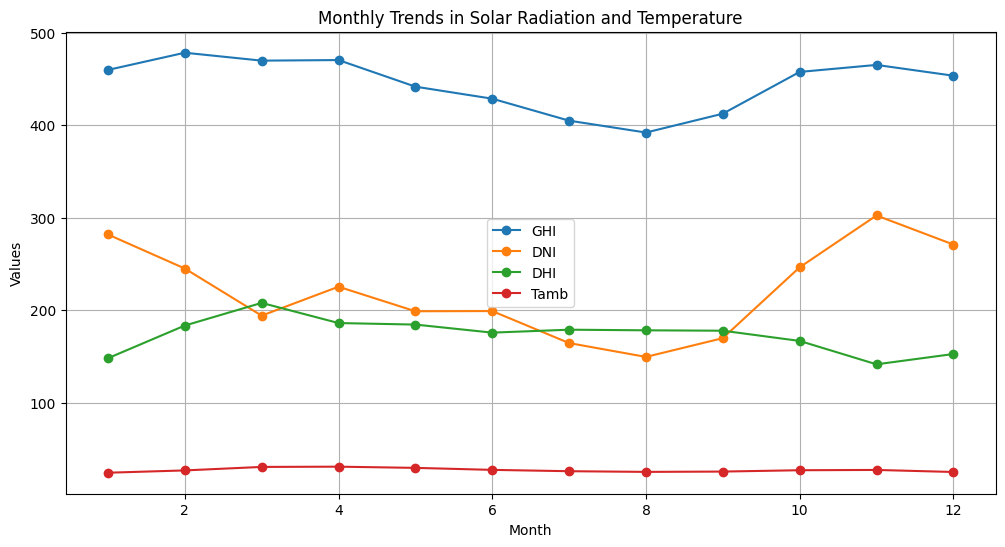

In [34]:
import matplotlib.pyplot as plt

# Plot monthly trends
plt.figure(figsize=(12, 6))
plt.plot(monthly_data['Month'], monthly_data['GHI'], label='GHI', marker='o')
plt.plot(monthly_data['Month'], monthly_data['DNI'], label='DNI', marker='o')
plt.plot(monthly_data['Month'], monthly_data['DHI'], label='DHI', marker='o')
plt.plot(monthly_data['Month'], monthly_data['Tamb'], label='Tamb', marker='o')

plt.title('Monthly Trends in Solar Radiation and Temperature')
plt.xlabel('Month')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()


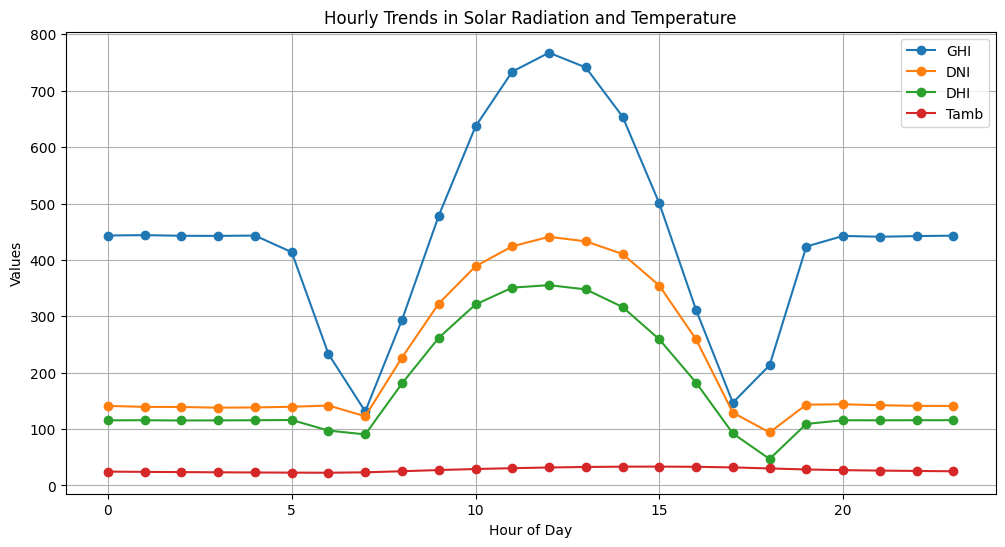

In [35]:
# Plot hourly trends
plt.figure(figsize=(12, 6))
plt.plot(hourly_data['Hour'], hourly_data['GHI'], label='GHI', marker='o')
plt.plot(hourly_data['Hour'], hourly_data['DNI'], label='DNI', marker='o')
plt.plot(hourly_data['Hour'], hourly_data['DHI'], label='DHI', marker='o')
plt.plot(hourly_data['Hour'], hourly_data['Tamb'], label='Tamb', marker='o')

plt.title('Hourly Trends in Solar Radiation and Temperature')
plt.xlabel('Hour of Day')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()


In [36]:
# Segment data into two groups: Cleaning (1) vs No Cleaning (0)
clean_data = merged_data[merged_data['Cleaning'] == 1]
no_clean_data = merged_data[merged_data['Cleaning'] == 0]

# Check the shapes of the groups
print(f"Data with Cleaning: {clean_data.shape}")
print(f"Data without Cleaning: {no_clean_data.shape}")


Data with Cleaning: (1274, 22)
Data without Cleaning: (1575526, 22)


In [37]:
# Aggregate data by hour for both cleaned and non-cleaned data
clean_hourly_data = clean_data.groupby('Hour')[['ModA', 'ModB']].mean().reset_index()
no_clean_hourly_data = no_clean_data.groupby('Hour')[['ModA', 'ModB']].mean().reset_index()

# Display the aggregated data
print("Clean Hourly Data:\n", clean_hourly_data.head())
print("No Clean Hourly Data:\n", no_clean_hourly_data.head())


Clean Hourly Data:
    Hour        ModA        ModB
0     6   79.412500   76.300000
1     7  106.080952  107.127619
2     8  257.438225  255.211413
3     9  384.513125  382.655937
4    10  565.582353  574.097647
No Clean Hourly Data:
    Hour      ModA      ModB
0     0  0.000008  0.000008
1     1  0.000008  0.000002
2     2  0.000014  0.000012
3     3  0.000000  0.000002
4     4  0.000002  0.000000


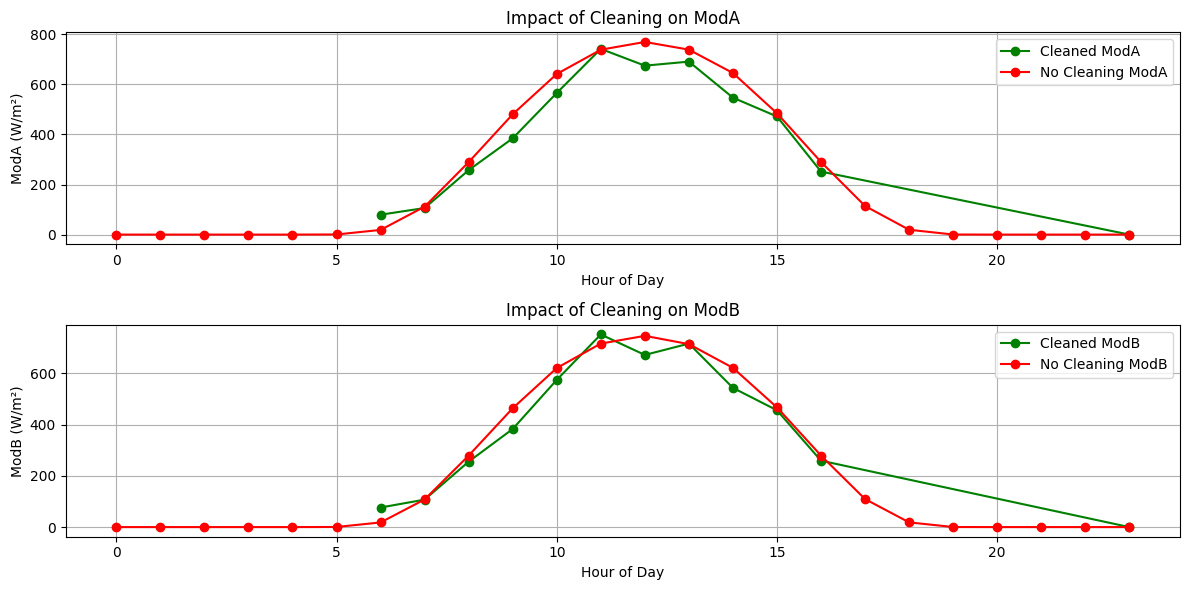

In [38]:
import matplotlib.pyplot as plt

# Plot the impact of cleaning on ModA and ModB
plt.figure(figsize=(12, 6))

# Plot for ModA
plt.subplot(2, 1, 1)
plt.plot(clean_hourly_data['Hour'], clean_hourly_data['ModA'], label='Cleaned ModA', marker='o', color='g')
plt.plot(no_clean_hourly_data['Hour'], no_clean_hourly_data['ModA'], label='No Cleaning ModA', marker='o', color='r')
plt.title('Impact of Cleaning on ModA')
plt.xlabel('Hour of Day')
plt.ylabel('ModA (W/m²)')
plt.legend()
plt.grid()

# Plot for ModB
plt.subplot(2, 1, 2)
plt.plot(clean_hourly_data['Hour'], clean_hourly_data['ModB'], label='Cleaned ModB', marker='o', color='g')
plt.plot(no_clean_hourly_data['Hour'], no_clean_hourly_data['ModB'], label='No Cleaning ModB', marker='o', color='r')
plt.title('Impact of Cleaning on ModB')
plt.xlabel('Hour of Day')
plt.ylabel('ModB (W/m²)')
plt.legend()
plt.grid()

# Display the plots
plt.tight_layout()
plt.show()



The plots show the impact of cleaning on ModA and ModB sensor readings over the course of a day. Both sensors exhibit a clear increase in readings as the day progresses, with the cleaned data (green line) showing a higher initial rise compared to the non-cleaned data (red line) in the morning hours. This suggests that cleaning improves sensor performance early in the day. However, as the day continues, the difference between cleaned and non-cleaned data becomes less pronounced, indicating that the cleaning effect is more noticeable in the morning and diminishes over time.

Correlation Matrix

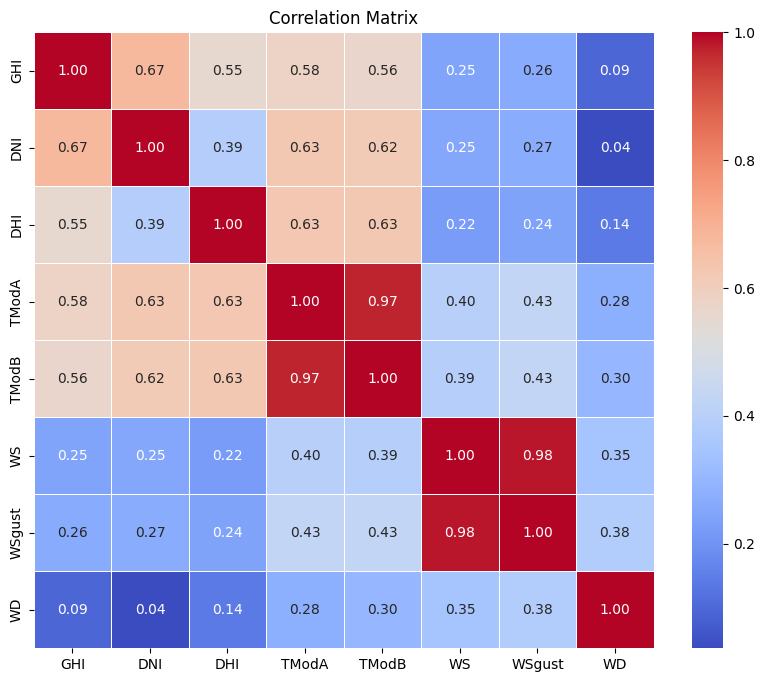

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select columns for correlation analysis
columns_for_correlation = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']

# Calculate the correlation matrix
correlation_matrix = merged_data[columns_for_correlation].corr()

# Plot the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


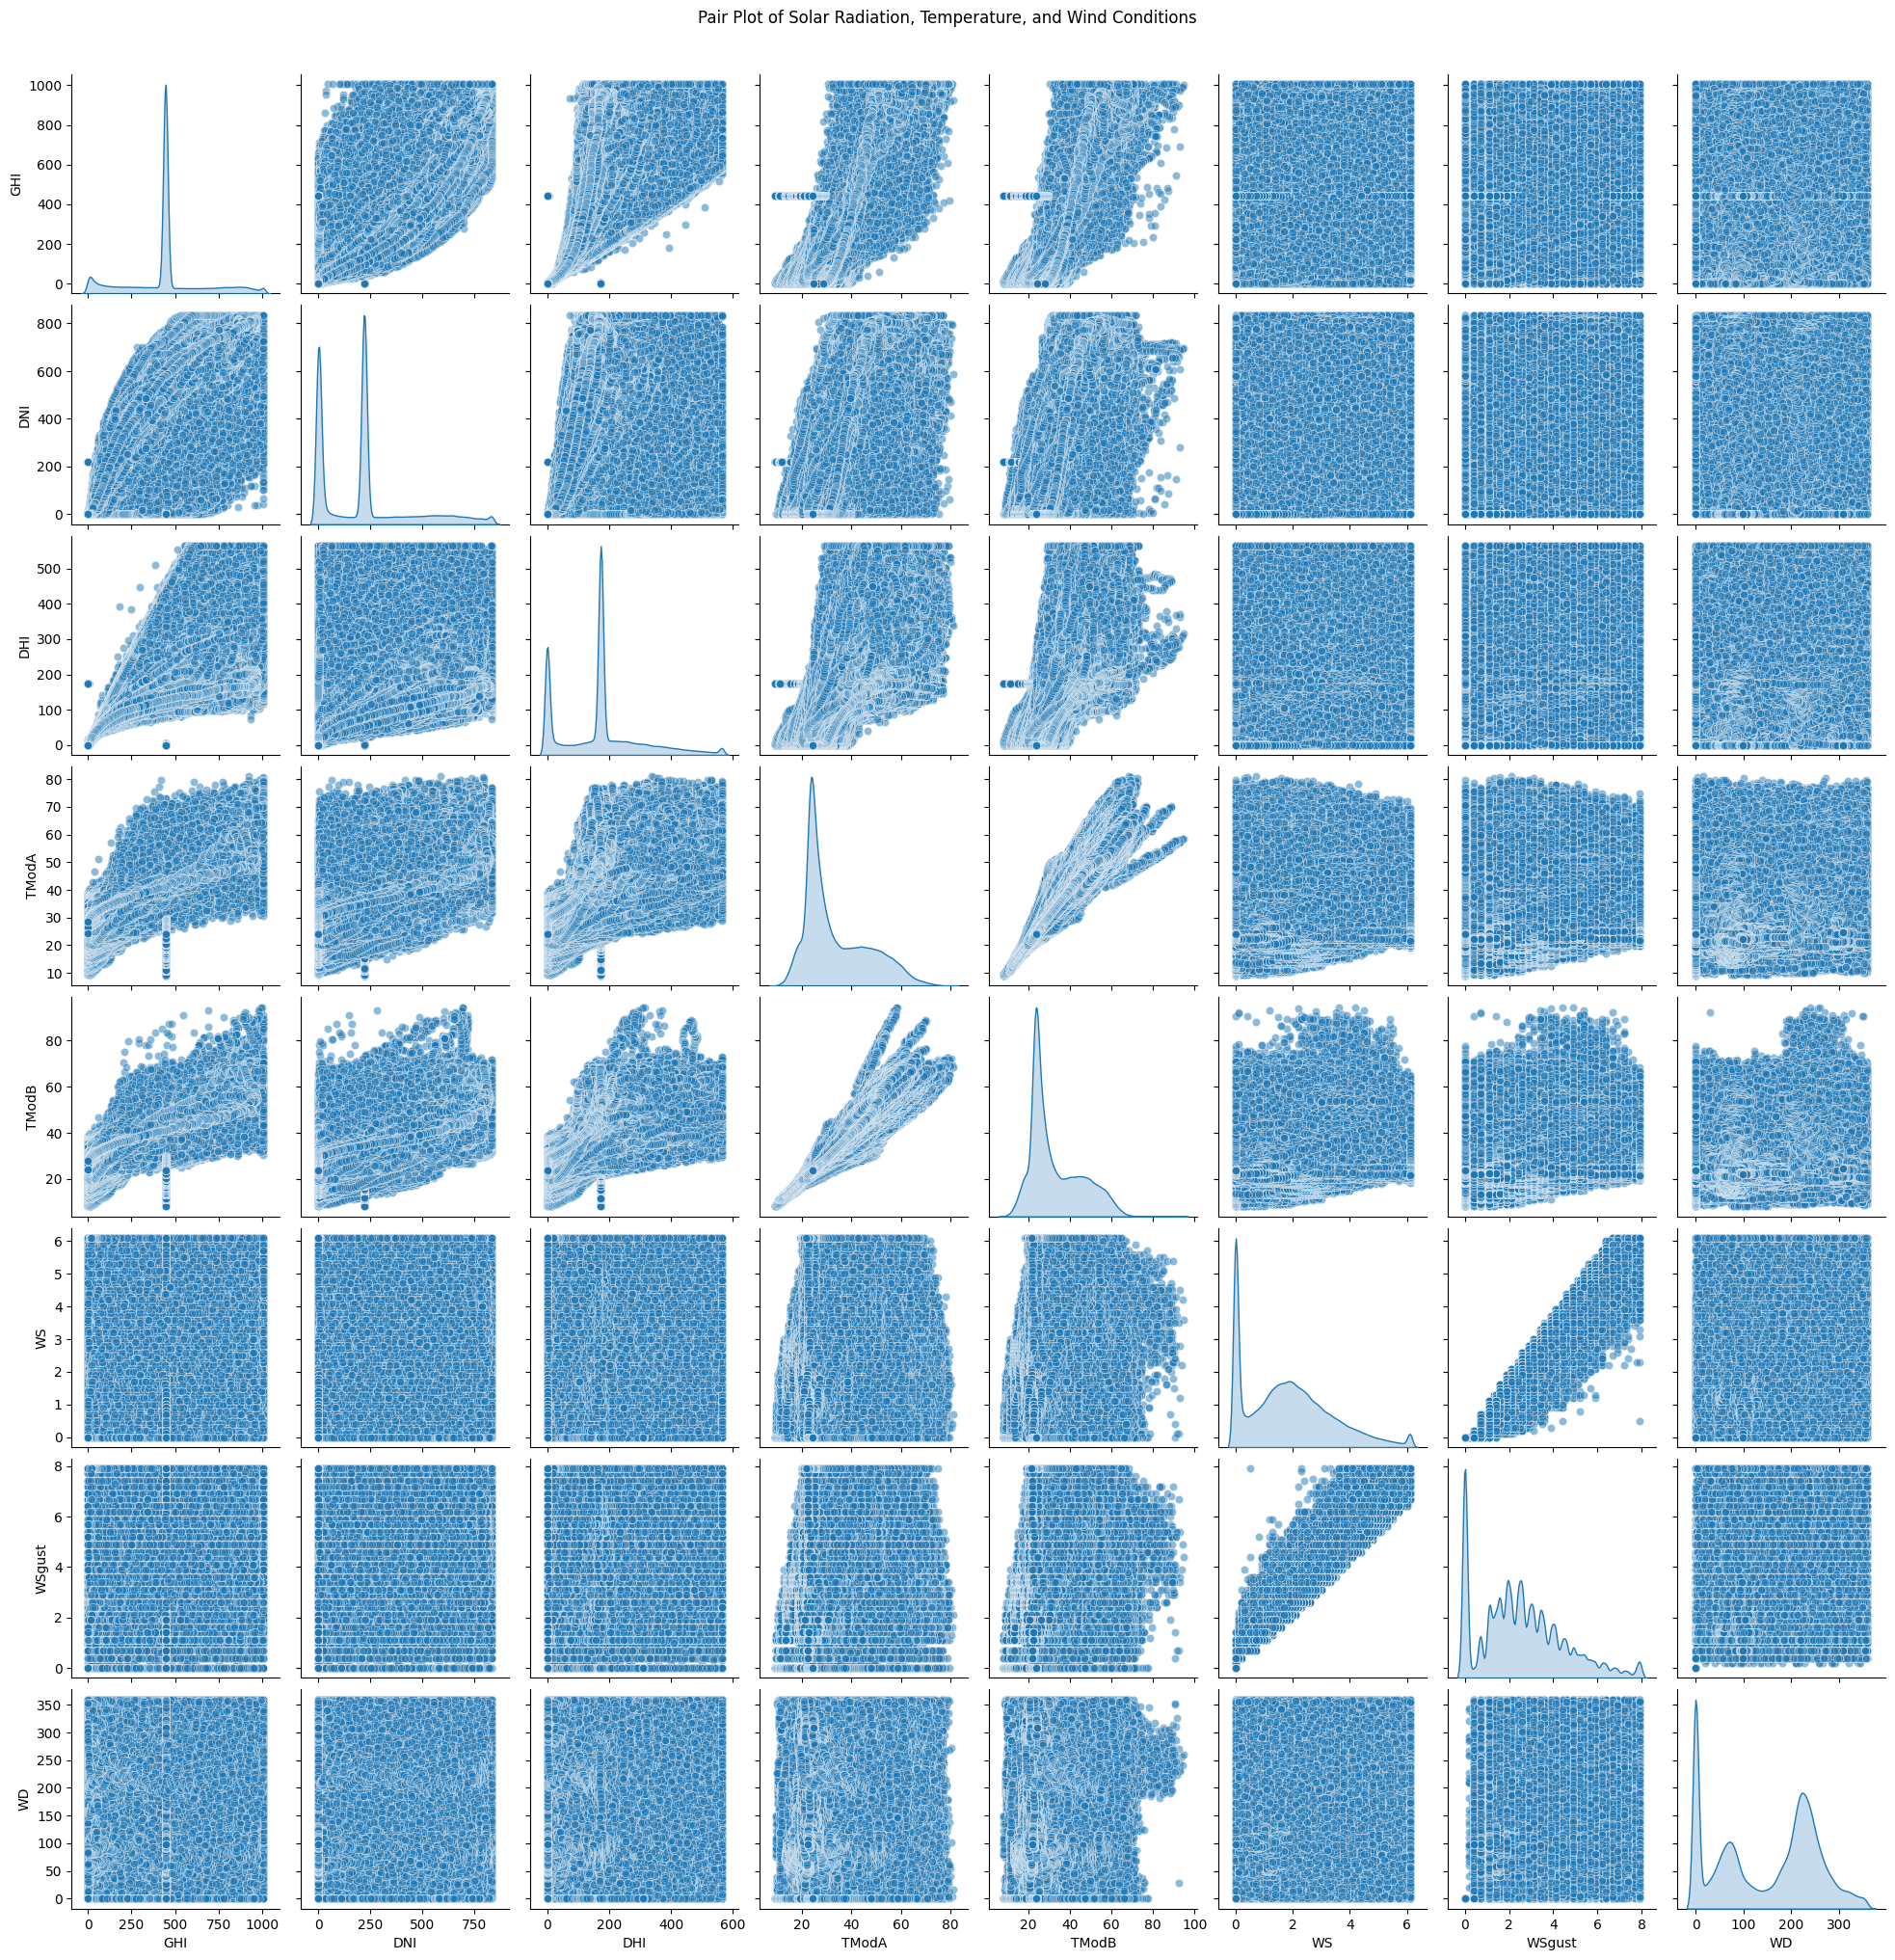

In [40]:
# Select columns for pair plot analysis
columns_for_pairplot = ['GHI', 'DNI', 'DHI', 'TModA', 'TModB', 'WS', 'WSgust', 'WD']

# Generate the pair plot
sns.pairplot(merged_data[columns_for_pairplot], height=2.5, diag_kind='kde', plot_kws={'alpha':0.5})
plt.suptitle('Pair Plot of Solar Radiation, Temperature, and Wind Conditions', y=1.02)
plt.show()


In [42]:
# Check column names in the dataset
print(merged_data.columns)


Index(['Timestamp', 'GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'Tamb', 'RH', 'WS',
       'WSgust', 'WSstdev', 'WD', 'WDstdev', 'BP', 'Cleaning', 'Precipitation',
       'TModA', 'TModB', 'country', 'Month', 'Hour', 'Day'],
      dtype='object')


KeyError: 'Cleaning'

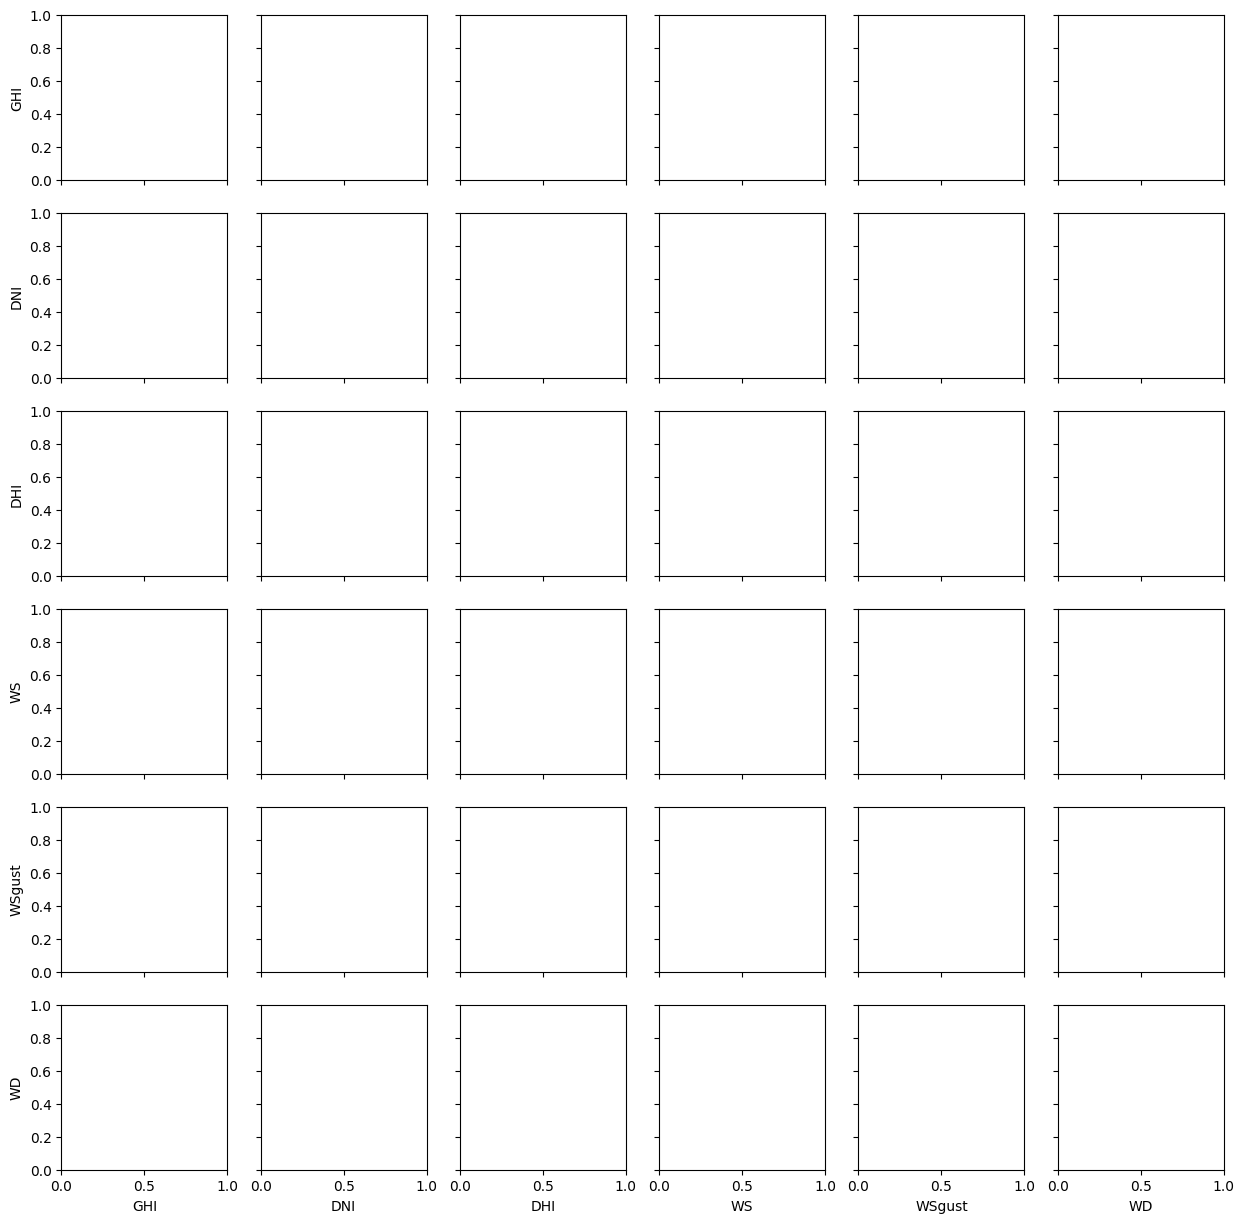

In [43]:
# Select columns for wind conditions and solar radiation
columns_for_scatter = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']

# Plot a scatter matrix to observe relationships between wind and solar irradiance
sns.pairplot(merged_data[columns_for_scatter], hue='Cleaning', height=2.5, plot_kws={'alpha': 0.5})
plt.suptitle('Scatter Matrix: Wind Conditions and Solar Irradiance', y=1.02)
plt.show()


In [44]:
# List of columns for the scatter plot matrix
columns_for_scatter = ['GHI', 'DNI', 'DHI', 'WS', 'WSgust', 'WD']

# Fill missing values in the selected columns with the mean value
merged_data[columns_for_scatter] = merged_data[columns_for_scatter].fillna(merged_data[columns_for_scatter].mean())

# Check if there are still any missing values in the selected columns
print(merged_data[columns_for_scatter].isnull().sum())


GHI       0
DNI       0
DHI       0
WS        0
WSgust    0
WD        0
dtype: int64


In [46]:
# Check for missing values in wind-related columns (Wind Speed and Wind Direction)
wind_columns = ['WS', 'WD']
merged_data[wind_columns] = merged_data[wind_columns].fillna(merged_data[wind_columns].mean())

# Optionally, check again for missing values after filling
print(merged_data[wind_columns].isnull().sum())


WS    0
WD    0
dtype: int64


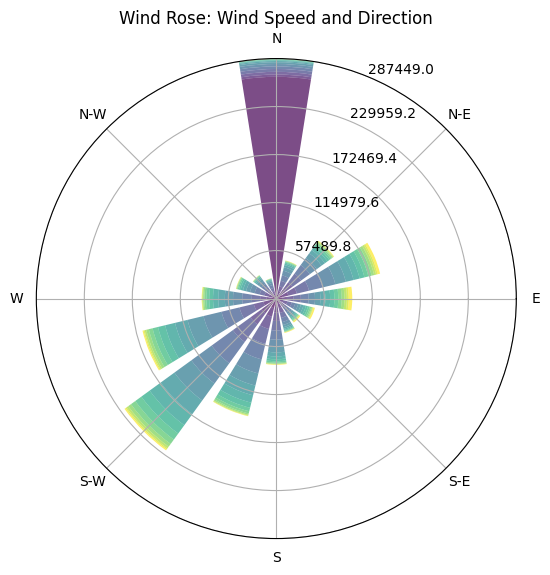

In [47]:
from windrose import WindroseAxes
import matplotlib.pyplot as plt

# Create a wind rose plot
def plot_wind_rose(data):
    fig = plt.figure(figsize=(8, 6))
    ax = WindroseAxes.from_ax(fig=fig)
    ax.bar(data['WD'], data['WS'], bins=16, alpha=0.7)  # 16 bins for wind direction
    ax.set_title('Wind Rose: Wind Speed and Direction')
    plt.show()

# Plot the wind rose for the dataset
plot_wind_rose(merged_data)


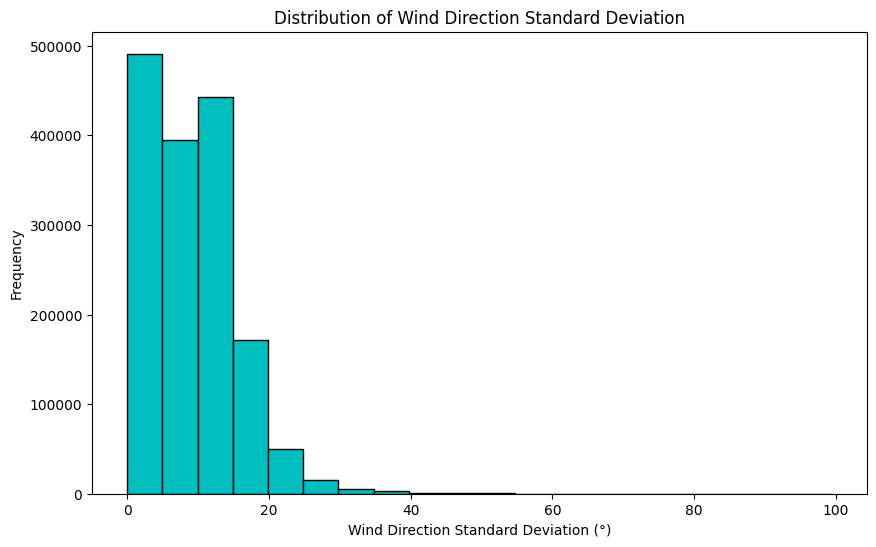

In [48]:
# Plot the standard deviation of wind direction (WDstdev)
plt.figure(figsize=(10, 6))
plt.hist(merged_data['WDstdev'], bins=20, color='c', edgecolor='black')
plt.title('Distribution of Wind Direction Standard Deviation')
plt.xlabel('Wind Direction Standard Deviation (°)')
plt.ylabel('Frequency')
plt.show()


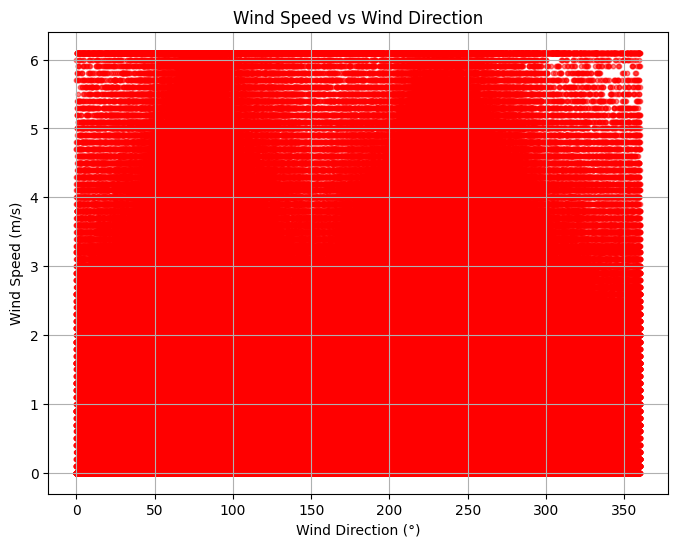

In [49]:
# Scatter plot of Wind Speed vs Wind Direction
plt.figure(figsize=(8, 6))
plt.scatter(merged_data['WD'], merged_data['WS'], alpha=0.5, color='r', s=10)
plt.title('Wind Speed vs Wind Direction')
plt.xlabel('Wind Direction (°)')
plt.ylabel('Wind Speed (m/s)')
plt.grid(True)
plt.show()


In [55]:
# Define the columns related to temperature and solar radiation
temperature_columns = ['Tamb', 'TModA', 'TModB']
solar_radiation_columns = ['GHI', 'DNI', 'DHI']

In [58]:
# Define the columns related to temperature and solar radiation
temperature_columns = ['Tamb', 'TModA', 'TModB']
solar_radiation_columns = ['GHI', 'DNI', 'DHI']

# Fill missing values for RH, temperature, and solar radiation columns with their mean
merged_data[['RH'] + temperature_columns + solar_radiation_columns] = merged_data[['RH'] + temperature_columns + solar_radiation_columns].fillna(merged_data[['RH'] + temperature_columns + solar_radiation_columns].mean())

# Optionally, check if missing values are filled
print(merged_data[['RH'] + temperature_columns + solar_radiation_columns].isnull().sum())


RH       0
Tamb     0
TModA    0
TModB    0
GHI      0
DNI      0
DHI      0
dtype: int64


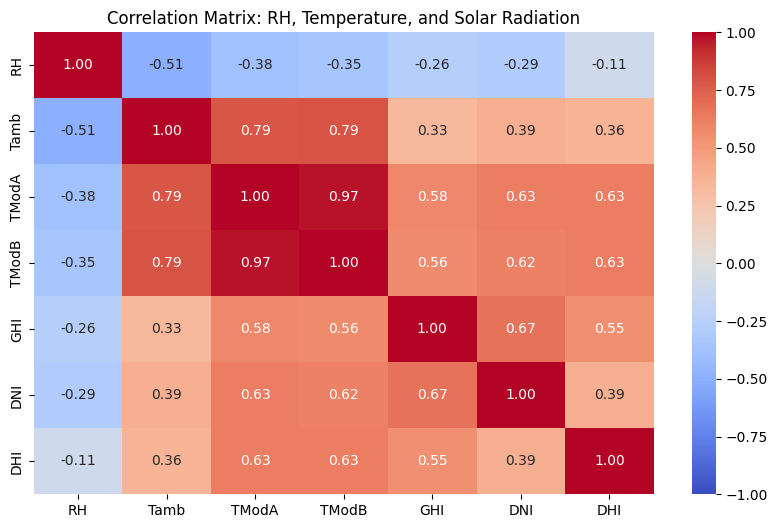

In [59]:
# Calculate the correlation matrix
correlation_columns = ['RH', 'Tamb', 'TModA', 'TModB', 'GHI', 'DNI', 'DHI']
correlation_matrix = merged_data[correlation_columns].corr()

# Display the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)
plt.title('Correlation Matrix: RH, Temperature, and Solar Radiation')
plt.show()


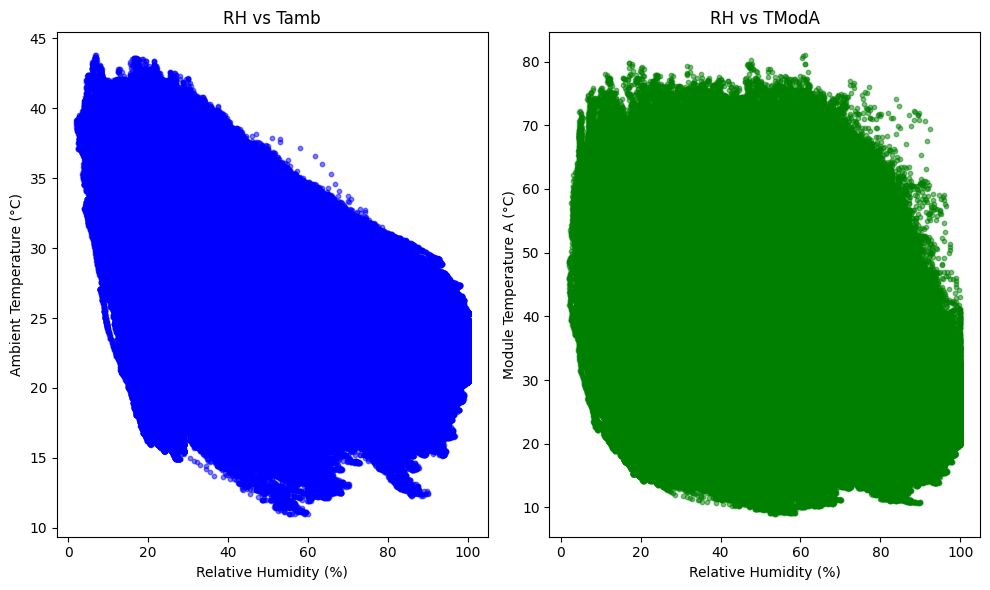

In [60]:
# Scatter plots to visualize the relationship between RH and temperature readings
plt.figure(figsize=(10, 6))

# RH vs Tamb
plt.subplot(1, 2, 1)
plt.scatter(merged_data['RH'], merged_data['Tamb'], alpha=0.5, color='blue', s=10)
plt.title('RH vs Tamb')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Ambient Temperature (°C)')

# RH vs TModA
plt.subplot(1, 2, 2)
plt.scatter(merged_data['RH'], merged_data['TModA'], alpha=0.5, color='green', s=10)
plt.title('RH vs TModA')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Module Temperature A (°C)')

plt.tight_layout()
plt.show()


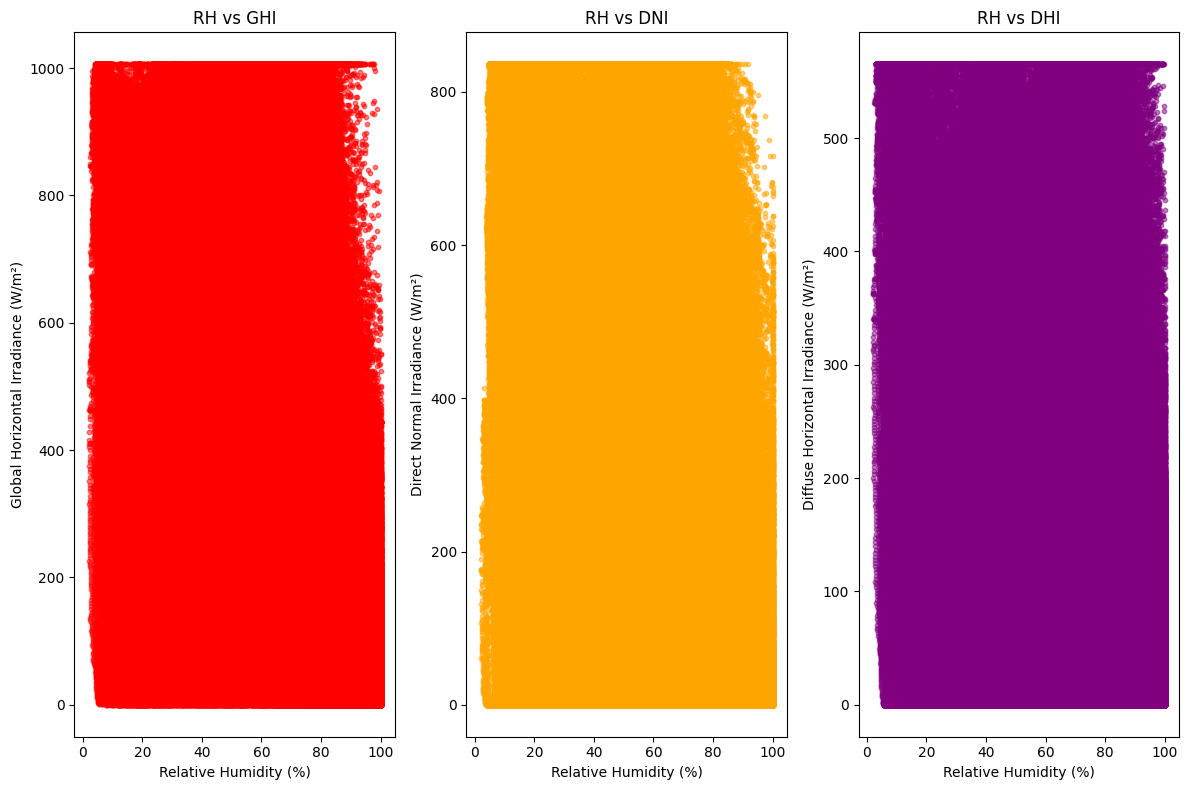

In [61]:
# Scatter plots to visualize the relationship between RH and solar radiation components
plt.figure(figsize=(12, 8))

# RH vs GHI
plt.subplot(1, 3, 1)
plt.scatter(merged_data['RH'], merged_data['GHI'], alpha=0.5, color='red', s=10)
plt.title('RH vs GHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Global Horizontal Irradiance (W/m²)')

# RH vs DNI
plt.subplot(1, 3, 2)
plt.scatter(merged_data['RH'], merged_data['DNI'], alpha=0.5, color='orange', s=10)
plt.title('RH vs DNI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Direct Normal Irradiance (W/m²)')

# RH vs DHI
plt.subplot(1, 3, 3)
plt.scatter(merged_data['RH'], merged_data['DHI'], alpha=0.5, color='purple', s=10)
plt.title('RH vs DHI')
plt.xlabel('Relative Humidity (%)')
plt.ylabel('Diffuse Horizontal Irradiance (W/m²)')

plt.tight_layout()
plt.show()


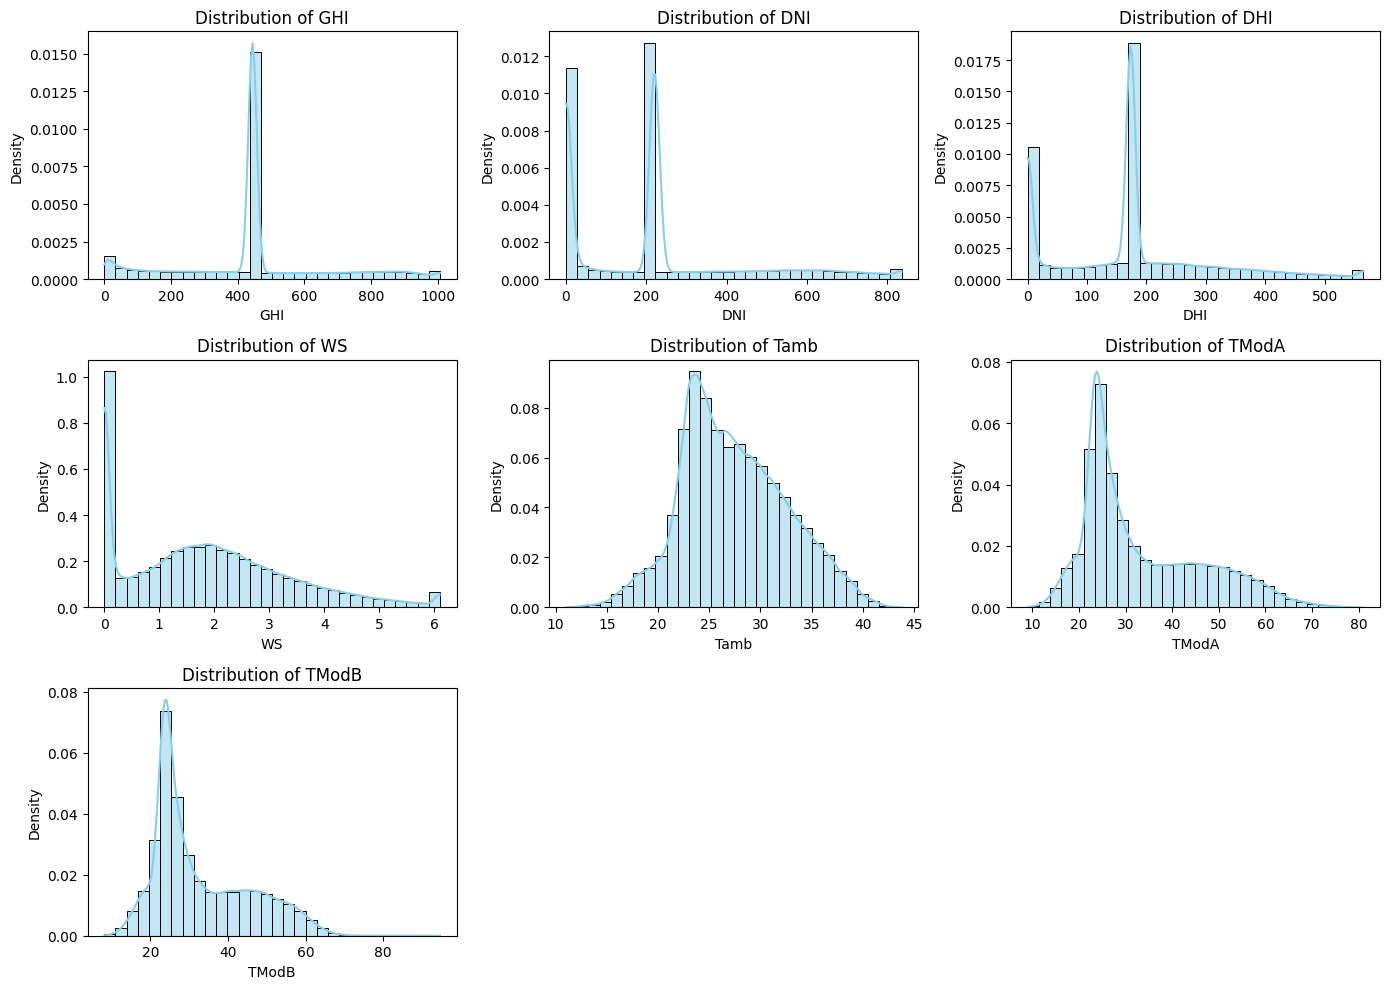

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the columns to plot histograms for
columns_to_plot = ['GHI', 'DNI', 'DHI', 'WS', 'Tamb', 'TModA', 'TModB']

# Set up the plot with subplots (one for each column)
plt.figure(figsize=(14, 10))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(3, 3, i)  # Create 3x3 grid for the histograms
    sns.histplot(merged_data[column], kde=True, bins=30, color='skyblue', stat='density')  # KDE for smoothness
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Density')

plt.tight_layout()
plt.show()


In [66]:
from scipy.stats import zscore

# List of columns to check for Z-scores (You can modify this list based on your dataset)
columns_to_check = ['GHI', 'DNI', 'DHI', 'ModA', 'ModB', 'WS', 'WSgust']

# Calculate the Z-scores for the selected columns
z_scores = merged_data[columns_to_check].apply(zscore)

# Identify rows with Z-scores greater than 3 or less than -3 (outliers)
outliers = merged_data[(z_scores.abs() > 3).any(axis=1)]

# Display the outliers
print(f"Outliers with Z-scores greater than 3 or less than -3:\n", outliers)

# Option to remove outliers



Outliers with Z-scores greater than 3 or less than -3:
 Empty DataFrame
Columns: [Timestamp, GHI, DNI, DHI, ModA, ModB, Tamb, RH, WS, WSgust, WSstdev, WD, WDstdev, BP, Cleaning, Precipitation, TModA, TModB, country, Month, Hour, Day]
Index: []

[0 rows x 22 columns]


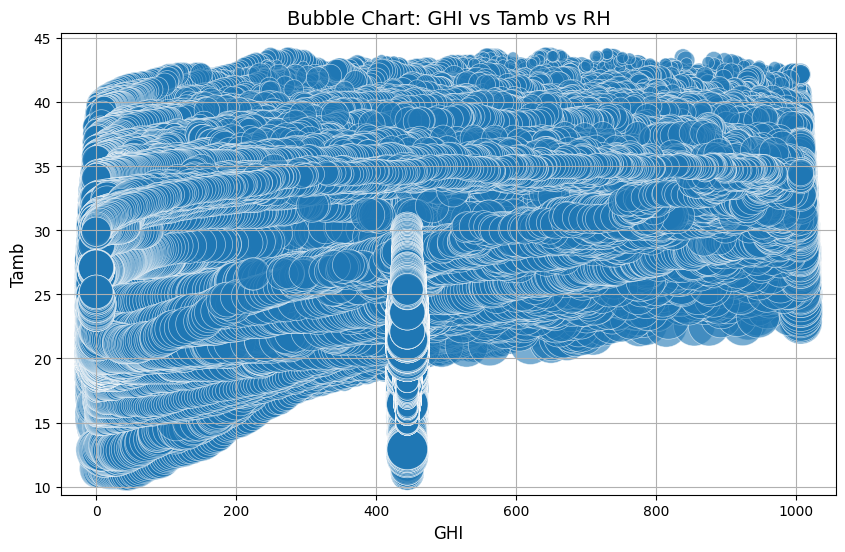

In [67]:
import matplotlib.pyplot as plt
import seaborn as sns

# Choose the variables to plot
x_variable = 'GHI'  # Global Horizontal Irradiance
y_variable = 'Tamb'  # Ambient Temperature
size_variable = 'RH'  # Relative Humidity or use 'BP' for Barometric Pressure

# Remove rows with missing values for the chosen columns
bubble_data = merged_data[[x_variable, y_variable, size_variable]].dropna()

# Create a scatter plot with bubble size
plt.figure(figsize=(10, 6))
plt.scatter(
    bubble_data[x_variable], bubble_data[y_variable],
    s=bubble_data[size_variable] * 10,  # Scale bubble size (adjust multiplier as needed)
    alpha=0.6, edgecolors="w", linewidth=0.5
)

# Add labels and title
plt.title(f'Bubble Chart: {x_variable} vs {y_variable} vs {size_variable}', fontsize=14)
plt.xlabel(x_variable, fontsize=12)
plt.ylabel(y_variable, fontsize=12)
plt.grid(True)

# Show the plot
plt.show()
